In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [5]:
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Input
from tensorflow.keras.applications import VGG16, Xception
from keras.utils import to_categorical
import pickle
import joblib
import requests, time, urllib

In [6]:
os.listdir('../input/disaster-images-dataset-cnn-model/DisasterModel/train')

['flood', 'cyclone', 'wildfire', 'earthquake']

In [7]:
len(os.listdir('../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood'))

1073

In [8]:
total = 0
sums = []
for i in range(len(os.listdir('../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset'))):
    #print(os.listdir('../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset')[i])
    path = '../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset'
    folder_path = path + '/' + os.listdir('../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset')[i]
    print(folder_path)
    if folder_path != '../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/readme.txt':
        sums.append(len(os.listdir(folder_path)))
        total += len(os.listdir(folder_path))

../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood
../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Cyclone
../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Wildfire
../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/readme.txt
../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Earthquake


In [9]:
with open('../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/readme.txt', 'r') as f:
    print(f.read())

ABOUT DATABASE
1. Images are collected from Google, it may be noisy and different resolutions, therefore, preprocessing is recommended.
2. Please remove irrelevant image if necessary
3. Number of image samples in each class is different which may result biased model. Select images according to your application.
4. I tried to remove duplicate images, still there may be some. Delete those images before training the model.



In [10]:
sums

[1073, 928, 1077, 1350]

In [11]:
total

4428

In [12]:
os.listdir('../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset')

['Flood', 'Cyclone', 'Wildfire', 'readme.txt', 'Earthquake']

From Here We're starting to add more images.

In [13]:
'''wildfire_url = ['https://unsplash.com/napi/search?query=fire&per_page=1000&xp=',
               'https://unsplash.com/napi/search?query=forestfire&per_page=1000&xp=',
               'https://unsplash.com/napi/search?query=fire&per_page=100&xp=',
               'https://www.gettyimages.in/photos/wildfire?license=rf%2Crm&page=1&phrase=wildfire&recency=anydate&servicecontext=srp-autosuggest&sort=mostpopular',
               'https://www.gettyimages.in/photos/forest-fire?license=rf%2Crm&page=1&phrase=forest%20fire&recency=anydate&servicecontext=srp-autosuggest&sort=mostpopular']

cyclone_url = ['https://www.google.com/complete/search?q&cp=0&client=img&xssi=t&gs_ri=gws-wiz-img&ds=i&hl=en&authuser=0&pq=cyclone%20images&psi=0JdTYPjOC4i13LUPpfKsmAI.1616090933193',
              'https://www.gettyimages.in/photos/cyclone?license=rf%2Crm&page=1&phrase=cyclone&recency=anydate&sort=mostpopular&suppressfamilycorrection=true&suppressphrasecorrection=true',
              'https://www.gettyimages.in/photos/cyclone-australia?license=rf%2Crm&page=1&phrase=cyclone%20australia&recency=anydate&sort=mostpopular&suppressfamilycorrection=true&suppressphrasecorrection=true',
              'https://www.google.com/complete/search?q&cp=0&client=img&xssi=t&gs_ri=gws-wiz-img&ds=i&hl=en&authuser=0&pq=cyclone%20images%20hd&psi=kptTYK33EcuLrtoP07O6uAU.1616091894521']

earthquake_url = ['https://unsplash.com/napi/search?query=earthquake&per_page=1000&xp=',
                 'https://unsplash.com/napi/search?query=earthquake%20damage&per_page=1000&xp=',
                 'https://www.google.com/complete/search?q&cp=0&client=img&xssi=t&gs_ri=gws-wiz-img&ds=i&hl=en&authuser=0&pq=earthquake%20images&psi=9ZlTYO3CH5irrtoPxf6S4AY.1616091483048',
                 'https://www.google.com/complete/search?q&cp=0&client=img&xssi=t&gs_ri=gws-wiz-img&ds=i&hl=en&authuser=0&pq=earthquake%20images&psi=QJpTYPDsOomprQGMkYZ4.1616091557797',
                 'https://www.google.com/complete/search?q&cp=0&client=img&xssi=t&gs_ri=gws-wiz-img&ds=i&hl=en&authuser=0&pq=earthquake%20images&psi=XZpTYL6dDcyerAGp5pdo.1616091586460',
                 'https://www.gettyimages.in/photos/earthquake-damage?license=rf%2Crm&page=1&phrase=earthquake%20damage&recency=anydate&sort=mostpopular&suppressfamilycorrection=true&suppressphrasecorrection=true']

flood_url = ['https://www.google.com/complete/search?q&cp=0&client=img&xssi=t&gs_ri=gws-wiz-img&ds=i&hl=en&authuser=0&pq=flood%20images%2000hd&psi=7JtTYPuYMNG9yAPByLBA.1616091985086',
            'https://www.google.com/complete/search?q&cp=0&client=img&xssi=t&gs_ri=gws-wiz-img&ds=i&hl=en&authuser=0&pq=flood%20images%2000hd&psi=E5xTYLvtG-W9rtoP4u-jwAI.1616092023933',
            'https://www.google.com/complete/search?q&cp=0&client=img&xssi=t&gs_ri=gws-wiz-img&ds=i&hl=en&authuser=0&pq=flood%20images%2000hd&psi=M5xTYL-SHdG9yAPByLBA.1616092055987',
            'https://unsplash.com/napi/search?query=flood&per_page=20&xp=',
            'https://unsplash.com/napi/search?query=flooding&per_page=20&xp='] '''

"wildfire_url = ['https://unsplash.com/napi/search?query=fire&per_page=1000&xp=',\n               'https://unsplash.com/napi/search?query=forestfire&per_page=1000&xp=',\n               'https://unsplash.com/napi/search?query=fire&per_page=100&xp=',\n               'https://www.gettyimages.in/photos/wildfire?license=rf%2Crm&page=1&phrase=wildfire&recency=anydate&servicecontext=srp-autosuggest&sort=mostpopular',\n               'https://www.gettyimages.in/photos/forest-fire?license=rf%2Crm&page=1&phrase=forest%20fire&recency=anydate&servicecontext=srp-autosuggest&sort=mostpopular']\n\ncyclone_url = ['https://www.google.com/complete/search?q&cp=0&client=img&xssi=t&gs_ri=gws-wiz-img&ds=i&hl=en&authuser=0&pq=cyclone%20images&psi=0JdTYPjOC4i13LUPpfKsmAI.1616090933193',\n              'https://www.gettyimages.in/photos/cyclone?license=rf%2Crm&page=1&phrase=cyclone&recency=anydate&sort=mostpopular&suppressfamilycorrection=true&suppressphrasecorrection=true',\n              'https://www.gettyim

In [14]:
os.listdir('../input/disaster-images-dataset-cnn-model/DisasterModel/train')

['flood', 'cyclone', 'wildfire', 'earthquake']

In [15]:
train_images = []
validation_images = []
train_labels = []
validation_labels = []
train_size = 0.85
validation_size = 0.15
additional_images = '../input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset'
for i in range(len(os.listdir(additional_images))):
    print(os.listdir(additional_images)[i])
    resulting_path = os.path.join(additional_images, os.listdir(additional_images)[i])
    if not resulting_path.endswith('.txt'):
        for j in range(len(os.listdir(resulting_path))):
            #print(os.listdir(additional_images)[i], j)
            if j < int(len(os.listdir(resulting_path))*0.85):
                img_path = os.path.join(resulting_path, os.listdir(resulting_path)[j])
                img = cv2.imread(img_path)
                img = cv2.resize(img, (224, 224))
                train_images.append(img/255)
                train_labels.append(os.listdir(additional_images)[i])
            else:
                img_path = os.path.join(resulting_path, os.listdir(resulting_path)[j])
                img = cv2.imread(img_path)
                img = cv2.resize(img, (224, 224))
                validation_images.append(img/255)
                validation_labels.append(os.listdir(additional_images)[i])

Flood
Cyclone
Wildfire
readme.txt
Earthquake


In [16]:
print('Training images set length: ', len(train_images))
print('Validation images set length: ', len(validation_images))
print('Training Labels set length: ', len(train_labels))
print('Validation Labels set length: ', len(validation_labels))

Training images set length:  3762
Validation images set length:  666
Training Labels set length:  3762
Validation Labels set length:  666


In [17]:
train_images = np.array(train_images)
validation_images = np.array(validation_images)
train_labels = np.array(train_labels)
validation_labels = np.array(validation_labels)

In [18]:
print(train_images.shape)
print(train_labels.shape)
print(validation_images.shape)
print(validation_labels.shape)

(3762, 224, 224, 3)
(3762,)
(666, 224, 224, 3)
(666,)


In [20]:
'''train_path = '../input/disaster-images-dataset-cnn-model/DisasterModel/train'
test_path = '../input/disaster-images-dataset-cnn-model/DisasterModel/test'
validation_path = '../input/disaster-images-dataset-cnn-model/DisasterModel/validation'''

"train_path = '../input/disaster-images-dataset-cnn-model/DisasterModel/train'\ntest_path = '../input/disaster-images-dataset-cnn-model/DisasterModel/test'\nvalidation_path = '../input/disaster-images-dataset-cnn-model/DisasterModel/validation"

In [21]:
'''os.listdir(train_path)'''

'os.listdir(train_path)'

In [22]:
'''train_images = []
train_labels = []
for i in range(len(os.listdir(train_path))):
    print(os.listdir(train_path)[i])
    images_folder = train_path + '/' + os.listdir(train_path)[i]
    for j in range(len(os.listdir(images_folder))):
        train_labels.append(os.listdir(train_path)[i])
        full_path = images_folder + '/' + os.listdir(images_folder)[j]
        img = cv2.imread(full_path)
        img = cv2.resize(img, (224, 224))
        train_images.append(img/255)
        print(i, j)'''

"train_images = []\ntrain_labels = []\nfor i in range(len(os.listdir(train_path))):\n    print(os.listdir(train_path)[i])\n    images_folder = train_path + '/' + os.listdir(train_path)[i]\n    for j in range(len(os.listdir(images_folder))):\n        train_labels.append(os.listdir(train_path)[i])\n        full_path = images_folder + '/' + os.listdir(images_folder)[j]\n        img = cv2.imread(full_path)\n        img = cv2.resize(img, (224, 224))\n        train_images.append(img/255)\n        print(i, j)"

In [23]:
'''train_images = np.array(train_images)
train_labels = np.array(train_labels)'''

'train_images = np.array(train_images)\ntrain_labels = np.array(train_labels)'

In [24]:
'''train_images.shape'''

'train_images.shape'

In [25]:
'''test_images = []
test_labels = []
for i in range(len(os.listdir(test_path))):
    print(os.listdir(test_path)[i])
    images_folder = test_path + '/' + os.listdir(test_path)[i]
    for j in range(len(os.listdir(images_folder))):
        test_labels.append(os.listdir(test_path)[i])
        full_path = images_folder + '/' + os.listdir(images_folder)[j]
        img = cv2.imread(full_path)
        img = cv2.resize(img, (224, 224))
        test_images.append(img/255)
        print(i, j)'''

"test_images = []\ntest_labels = []\nfor i in range(len(os.listdir(test_path))):\n    print(os.listdir(test_path)[i])\n    images_folder = test_path + '/' + os.listdir(test_path)[i]\n    for j in range(len(os.listdir(images_folder))):\n        test_labels.append(os.listdir(test_path)[i])\n        full_path = images_folder + '/' + os.listdir(images_folder)[j]\n        img = cv2.imread(full_path)\n        img = cv2.resize(img, (224, 224))\n        test_images.append(img/255)\n        print(i, j)"

In [26]:
'''test_images = np.array(test_images)
test_labels = np.array(test_labels)'''

'test_images = np.array(test_images)\ntest_labels = np.array(test_labels)'

In [27]:
'''test_images.shape'''

'test_images.shape'

In [28]:
'''validation_images = []
validation_labels = []
for i in range(len(os.listdir(validation_path))):
    print(os.listdir(validation_path)[i])
    images_folder = validation_path + '/' + os.listdir(validation_path)[i]
    for j in range(len(os.listdir(images_folder))):
        validation_labels.append(os.listdir(validation_path)[i])
        full_path = images_folder + '/' + os.listdir(images_folder)[j]
        img = cv2.imread(full_path)
        img = cv2.resize(img, (224, 224))
        validation_images.append(img/255)
        print(i, j)'''

"validation_images = []\nvalidation_labels = []\nfor i in range(len(os.listdir(validation_path))):\n    print(os.listdir(validation_path)[i])\n    images_folder = validation_path + '/' + os.listdir(validation_path)[i]\n    for j in range(len(os.listdir(images_folder))):\n        validation_labels.append(os.listdir(validation_path)[i])\n        full_path = images_folder + '/' + os.listdir(images_folder)[j]\n        img = cv2.imread(full_path)\n        img = cv2.resize(img, (224, 224))\n        validation_images.append(img/255)\n        print(i, j)"

In [29]:
'''validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)'''

'validation_images = np.array(validation_images)\nvalidation_labels = np.array(validation_labels)'

In [30]:
'''validation_images.shape'''

'validation_images.shape'

In [31]:
train_labels

array(['Flood', 'Flood', 'Flood', ..., 'Earthquake', 'Earthquake',
       'Earthquake'], dtype='<U10')

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
le = LabelEncoder()
leb = LabelBinarizer()
train_labels = leb.fit_transform(train_labels)
#test_labels = leb.transform(test_labels)
validation_labels = leb.transform(validation_labels)

In [33]:
# BEFORE CONVERSION: 
# Flood -> 0
# Cyclone -> 1
# Wildfire -> 2
# Earthquake -> 3
#===========================
train_labels
# AFTER CONVERSION:
# Flood -> 2
# Cyclone -> 0
# Wildfire -> 3
# Earthquake -> 1

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

In [34]:
'''train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)'''

'train_labels = to_categorical(train_labels)\nvalidation_labels = to_categorical(validation_labels)\ntest_labels = to_categorical(test_labels)'

In [35]:
baseModel = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=Input(shape=(224, 224, 3)),
    input_shape=None,
    pooling=None,
    classes=4
)
#baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(100, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(4, activation="softmax")(headModel)

83689472/83683744 [==============================] - 0s 0us/step


In [36]:
for layer in baseModel.layers:
    layer.trainable = False

In [37]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [39]:
model.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [40]:
history = model.fit(train_images, train_labels, epochs = 30, batch_size = 100, validation_data=(validation_images, validation_labels))

Epoch 1/30
38/38 [==============================] - 18s 331ms/step - loss: 2.8150 - accuracy: 0.7000 - val_loss: 0.2679 - val_accuracy: 0.9114
Epoch 2/30
38/38 [==============================] - 11s 281ms/step - loss: 0.2963 - accuracy: 0.9011 - val_loss: 0.2459 - val_accuracy: 0.9189
Epoch 3/30
38/38 [==============================] - 11s 281ms/step - loss: 0.2330 - accuracy: 0.9165 - val_loss: 0.2228 - val_accuracy: 0.9234
Epoch 4/30
38/38 [==============================] - 11s 280ms/step - loss: 0.2211 - accuracy: 0.9140 - val_loss: 0.2149 - val_accuracy: 0.9279
Epoch 5/30
38/38 [==============================] - 11s 279ms/step - loss: 0.1542 - accuracy: 0.9391 - val_loss: 0.2247 - val_accuracy: 0.9339
Epoch 6/30
38/38 [==============================] - 11s 278ms/step - loss: 0.1306 - accuracy: 0.9497 - val_loss: 0.2221 - val_accuracy: 0.9234
Epoch 7/30
38/38 [==============================] - 10s 276ms/step - loss: 0.1304 - accuracy: 0.9483 - val_loss: 0.2355 - val_accuracy: 0.9249

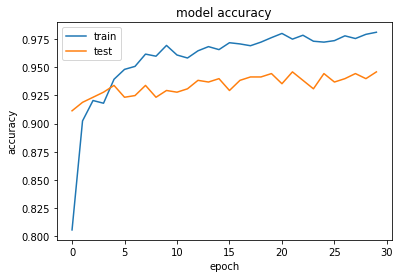

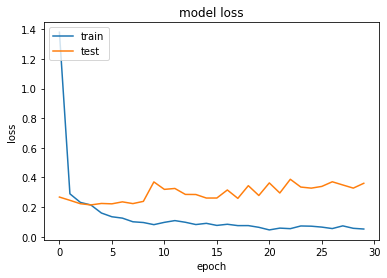

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
model.save_weights('model.h5')

In [43]:
tf.keras.models.save_model(model, 'model_hdf5_one.hdf5')

In [44]:
pickle.dumps(model)

TypeError: can't pickle weakref objects

In [ ]:
joblib.dump(model, 'pickled.pkl')

In [ ]:
loaded = pickle.loads('./pickled_model')

In [ ]:
model.summary()